<a href="https://colab.research.google.com/github/VagnerProjects/data-science/blob/main/src/DataScience/MulheresPolitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('/content/sample_data/parlamentares_abril_2023.xlsx')

In [3]:
df['Mulheres_Senado'] = df['Mulheres_Senado'].replace('-', '0')

df['Mulheres_Camaras_Deputados'] = df['Mulheres_Camaras_Deputados'].replace('-', '0')
df['Assentos_Camara_Deputados'] = df['Assentos_Camara_Deputados'].replace('-', '0')
df['Assentos_Senado'] = df['Assentos_Senado'].replace('-', '0')



In [4]:
df['Assentos_Camara_Deputados'] = df['Assentos_Camara_Deputados'].astype(int)
df['Mulheres_Camaras_Deputados'] = df['Mulheres_Camaras_Deputados'].astype(int)
df['Assentos_Senado'] = df['Assentos_Senado'].astype(int)
df['Mulheres_Senado'] = df['Mulheres_Senado'].astype(int)

In [5]:
df['Homens_Camaras_Deputados'] = df['Assentos_Camara_Deputados'] - df['Mulheres_Camaras_Deputados']
df['Homens_Senado'] = df.Assentos_Senado - df.Mulheres_Senado
df['Homens_Senado'] = df['Homens_Senado'].astype(int)
df.head()

,Rank,Pais,Ano_Eleicoes_Camara,Assentos_Camara_Deputados,Mulheres_Camaras_Deputados,Porcentagem de Mulheres,Ano_Eleicoes_Senado,Assentos_Senado,Mulheres_Senado,Porcentagem de Mulheres.1,Homens_Camaras_Deputados,Homens_Senado
0,1,Rwanda,9.2018,80,49,61.3,09.2019,26,9,34.6,31,17
1,2,Cuba,3.2023,470,262,55.7,-,0,0,-,208,0
2,3,Nicaragua,11.2021,91,47,51.7,-,0,0,-,44,0
3,4,Mexico,6.2021,500,250,50.0,07.2018,127,64,50.4,250,63
4,5,New Zealand,10.2020,120,60,50.0,-,0,0,-,60,0


In [6]:
df_brazil = df.loc[df.Pais == 'Brazil']

df_brazil

,Rank,Pais,Ano_Eleicoes_Camara,Assentos_Camara_Deputados,Mulheres_Camaras_Deputados,Porcentagem de Mulheres,Ano_Eleicoes_Senado,Assentos_Senado,Mulheres_Senado,Porcentagem de Mulheres.1,Homens_Camaras_Deputados,Homens_Senado
130,131,Brazil,10.2022,513,90,17.5,10.2022,81,15,18.5,423,66


In [7]:
df_filter = df_brazil[['Mulheres_Camaras_Deputados', 'Homens_Camaras_Deputados']]

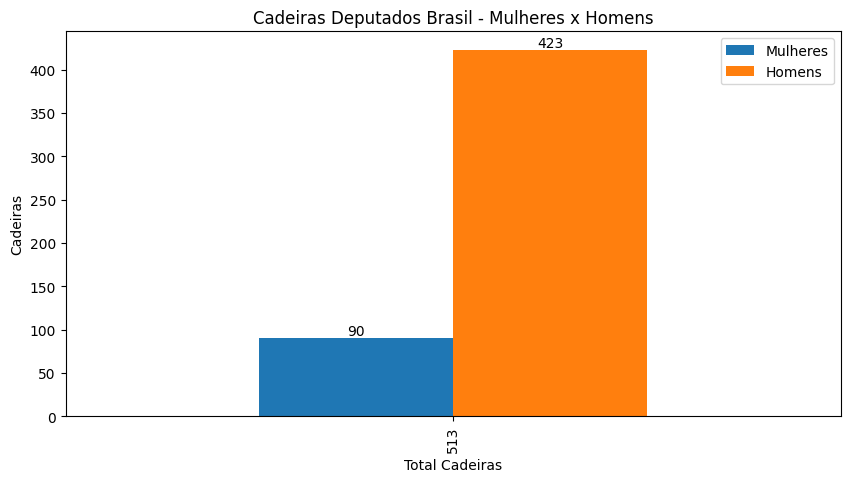

In [8]:
ax = df_brazil.plot(x='Assentos_Camara_Deputados',y=['Mulheres_Camaras_Deputados', 'Homens_Camaras_Deputados'], figsize=(10, 5), kind='bar')

for container in ax.containers:
    ax.bar_label(container)

plt.title("Cadeiras Deputados Brasil - Mulheres x Homens")
plt.ylabel('Cadeiras')
plt.legend(["Mulheres", "Homens"])
plt.xlabel('Total Cadeiras')
plt.show()


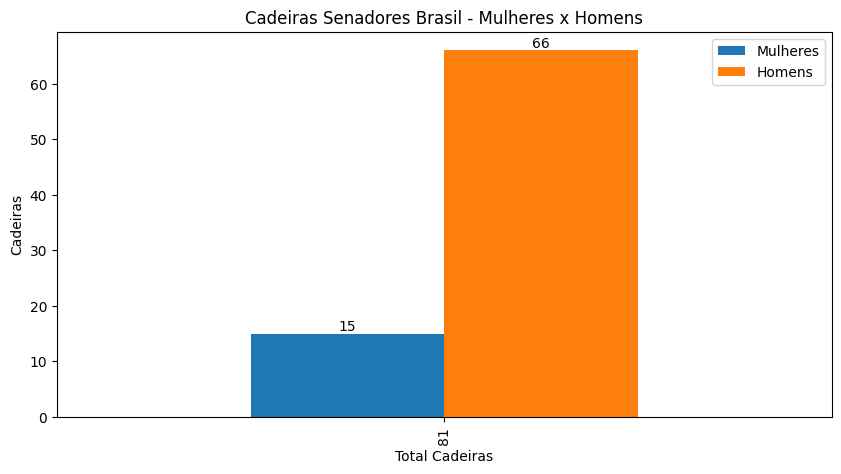

In [9]:
ax = df_brazil.plot(x='Assentos_Senado',y=['Mulheres_Senado', 'Homens_Senado'], figsize=(10, 5), kind='bar')

for container in ax.containers:
    ax.bar_label(container)

plt.title("Cadeiras Senadores Brasil - Mulheres x Homens")
plt.ylabel('Cadeiras')
plt.legend(["Mulheres", "Homens"])
plt.xlabel('Total Cadeiras')
plt.show()


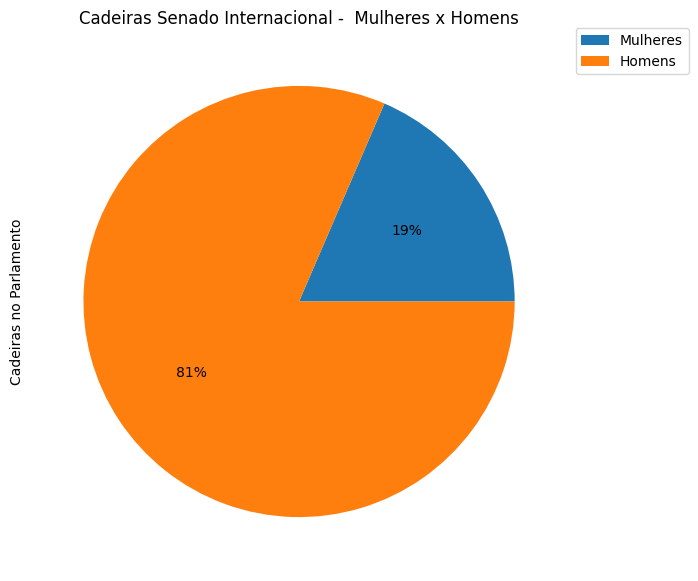

In [25]:
fig = plt.figure(figsize =(8, 7))
  
labels = {'Mulheres':'Mulheres', 'Homens': 'Homens'}
ax = df_brazil[['Mulheres_Senado','Homens_Senado']].sum().plot.pie(title="Cadeiras no Senado Internacional", legend=True, autopct='%1.0f%%',
                                                             ylabel='', labeldistance=None)

for container in ax.containers:
    ax.bar_label(container)


ax.legend(['Mulheres', 'Homens'],bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title("Cadeiras Senado Internacional -  Mulheres x Homens")
plt.ylabel('Cadeiras no Parlamento')

plt.show()

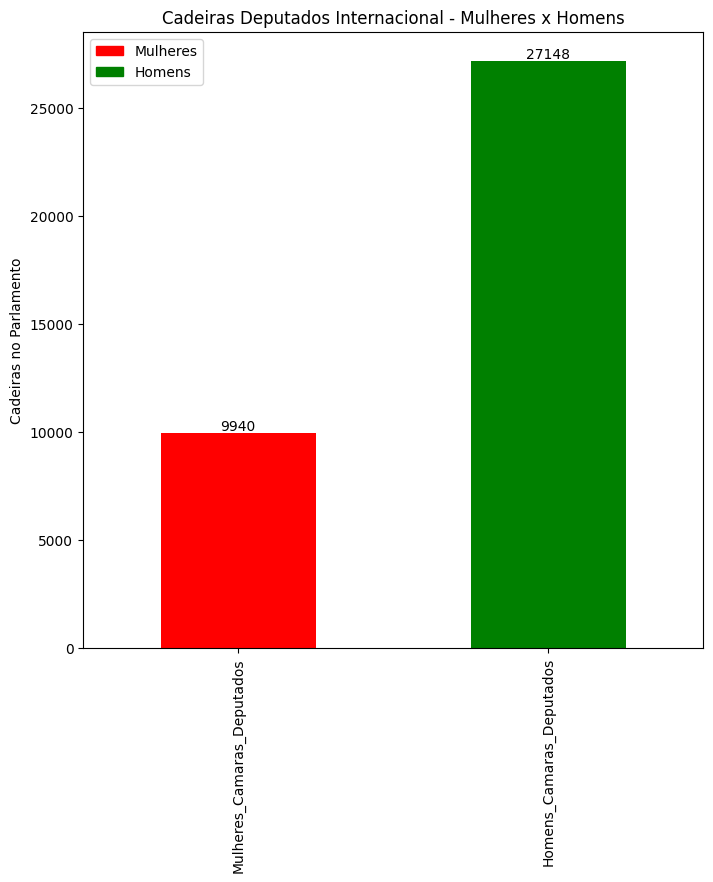

In [10]:
fig = plt.figure(figsize =(8, 8))
  
labels = {'Mulheres':'Mulheres', 'Homens': 'Homens'}
ax = df[['Mulheres_Camaras_Deputados','Homens_Camaras_Deputados']].sum().plot.bar(title="Cadeiras deputados internacional",color=['red', 'green'])

for container in ax.containers:
    ax.bar_label(container)

colors = {'red':'red', 'green':'green'}         
cores_labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in cores_labels]
plt.legend(handles, labels)
plt.title("Cadeiras Deputados Internacional - Mulheres x Homens")
plt.ylabel('Cadeiras no Parlamento')

plt.show()



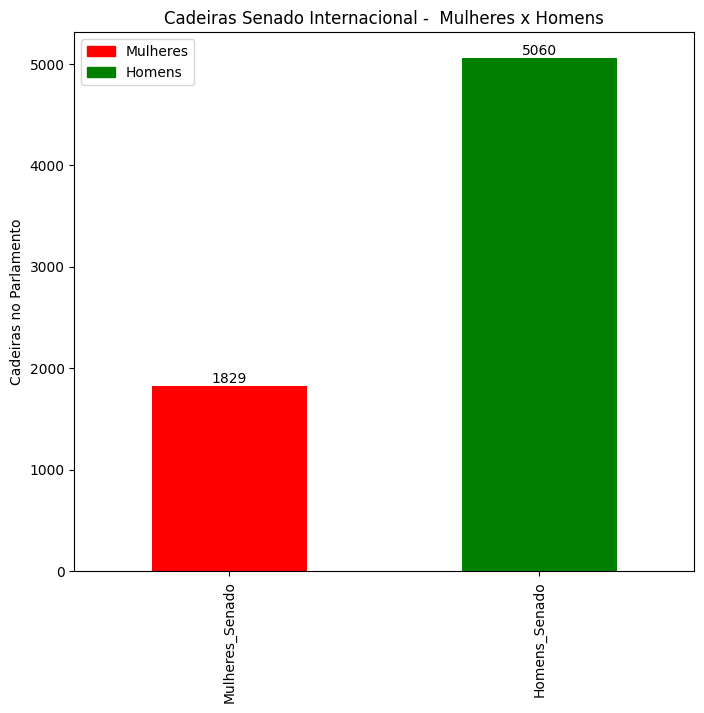

In [11]:
fig = plt.figure(figsize =(8, 7))
  
labels = {'Mulheres':'Mulheres', 'Homens': 'Homens'}
ax = df[['Mulheres_Senado','Homens_Senado']].sum().plot.bar(title="Cadeiras no Senado Internacional",color=['red', 'green'])

for container in ax.containers:
    ax.bar_label(container)

colors = {'red':'red', 'green':'green'}         
cores_labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in cores_labels]
plt.legend(handles, labels)
plt.title("Cadeiras Senado Internacional -  Mulheres x Homens")
plt.ylabel('Cadeiras no Parlamento')

plt.show()

In [33]:
df_total = df
df_total['MulheresTotal'] = sum(df['Mulheres_Senado']) + sum(df['Mulheres_Camaras_Deputados'])
df_total['HomensTotal'] = sum(df['Homens_Senado'] ) + sum(df['Homens_Camaras_Deputados'] )

df_total = df[['MulheresTotal', 'HomensTotal']].head(1)
df_total

,MulheresTotal,HomensTotal
0,11769,32208


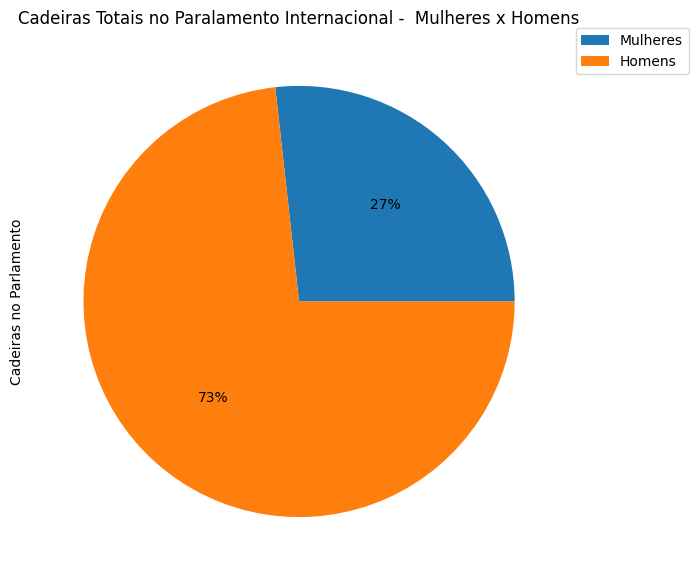

In [35]:
fig = plt.figure(figsize =(8, 7))


labels = {'Mulheres':'Mulheres', 'Homens': 'Homens'}
ax = df_total[['MulheresTotal','HomensTotal']].sum().plot.pie(title="Cadeiras totais no Parlamentoo Internacional", legend=True, autopct='%1.0f%%',
                                                             ylabel='', labeldistance=None)

for container in ax.containers:
    ax.bar_label(container)


ax.legend(['Mulheres', 'Homens'],bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title("Cadeiras Totais no Paralamento Internacional -  Mulheres x Homens")
plt.ylabel('Cadeiras no Parlamento')

plt.show()

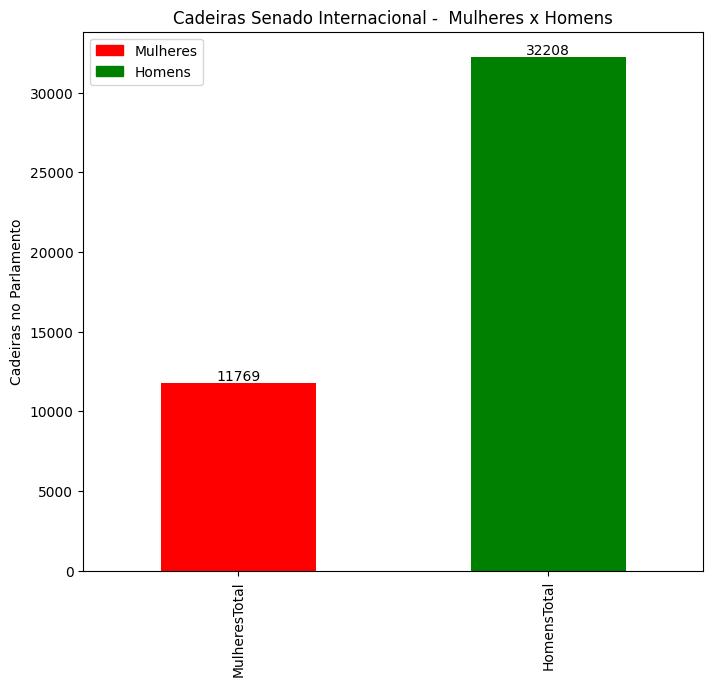

In [36]:
fig = plt.figure(figsize =(8, 7))
  
labels = {'Mulheres':'Mulheres', 'Homens': 'Homens'}
ax = df_total[['MulheresTotal','HomensTotal']].sum().plot.bar(title="Cadeiras no Senado Internacional",color=['red', 'green'])

for container in ax.containers:
    ax.bar_label(container)

colors = {'red':'red', 'green':'green'}         
cores_labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in cores_labels]
plt.legend(handles, labels)
plt.title("Cadeiras Senado Internacional -  Mulheres x Homens")
plt.ylabel('Cadeiras no Parlamento')

plt.show()